## Home task 


1. Clustering on Iris dataset

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px

In [39]:
# 1. Load the dataset
data = pd.read_csv("./datasets/Iris.csv", index_col='Id')
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [40]:
features = data.drop(columns=['Species'])
features.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3
8,5.0,3.4,1.5,0.2
9,4.4,2.9,1.4,0.2


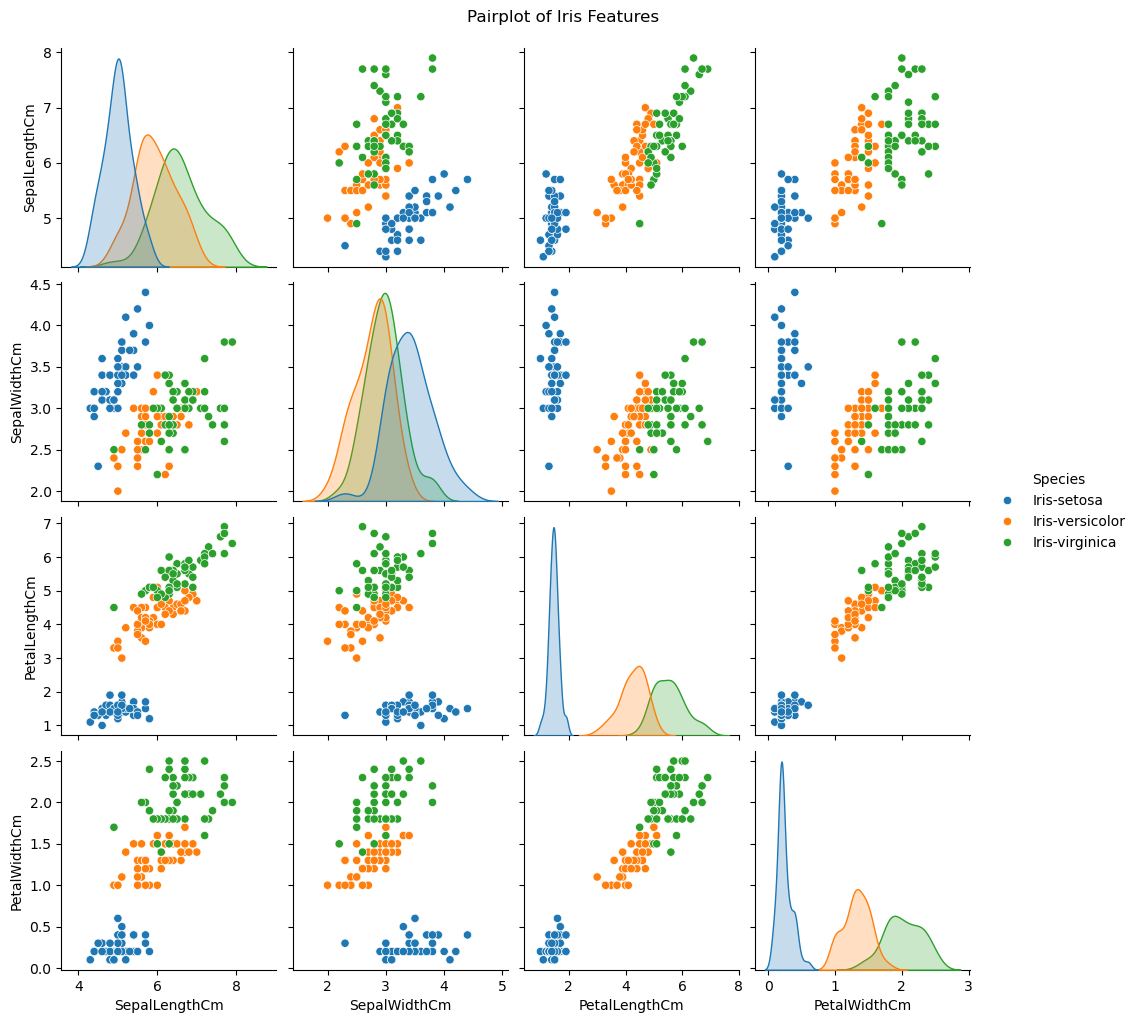

In [41]:
#3. EDA - Exploratory Data Analysis
sns.pairplot(data, hue='Species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

In [42]:
# 4. Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

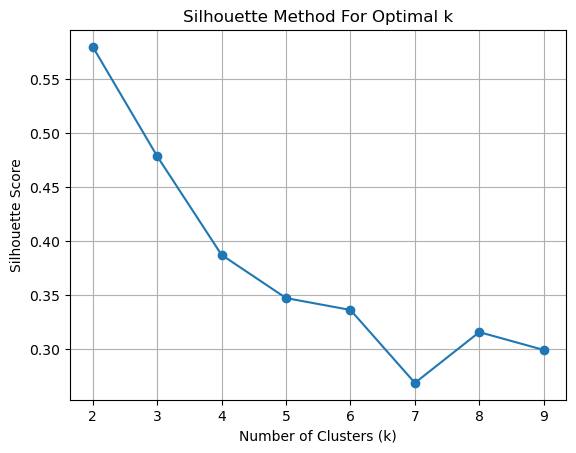

In [43]:
# 5. Determine optimal number of clusters using silhouette score
import os
os.environ["OMP_NUM_THREADS"] = "1"
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method For Optimal k")
plt.grid(True)
plt.show()

In [44]:
# 6. Choose optimal k and fit KMeans
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [45]:
# 7. Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

In [46]:
# 8. Visualizations

# True species
fig1 = px.scatter(data, x='SepalLengthCm', y='SepalWidthCm', color='Species',
                  title="True Species")
fig1.show()

In [47]:
# Clusters
fig2 = px.scatter(data, x='SepalLengthCm', y='SepalWidthCm', color=data['cluster'].astype(str),
                  title=f"Clusters by KMeans (k={optimal_k})")
fig2.show()

In [48]:
# PCA visualization of clusters
fig3 = px.scatter(data, x='PCA1', y='PCA2', color=data['cluster'].astype(str),
                  symbol='Species', title="Clusters in PCA Space")
fig3.show()

In [49]:
# Visualization of clusters by SepalLengthCm and SepalWidthCm
fig4 = px.scatter(data, x='SepalLengthCm', y='SepalWidthCm',
                  color=data['cluster'].astype(str),
                  title='Clusters by features SepalLengthCm and SepalWidthCm')
fig4.show()

In [50]:
# Visualization by PetalLengthCm and PetalWidthCm
fig5 = px.scatter(data, x='PetalLengthCm', y='PetalWidthCm',
                  color=data['cluster'].astype(str),
                  title='Clusters by features PetalLengthCm and PetalWidthCm')
fig5.show()

### Home task (alternative)

#### Steps of implementatiion
Initialize K centroids

Assign every point to closest centroid

Compute new centroids as means of samples assigned to corresponding centroid

Calculate cost

Iterate steps 2,3 till cost is stabile

Select the best clustering (with the least cost) from 100 results computed with random centroid initializations

Visualize results (clusters, centroids) for 

Note:

You may need develop couple of additional/intermediate functions
You may track cost changes to make sure the algorithm is working properly

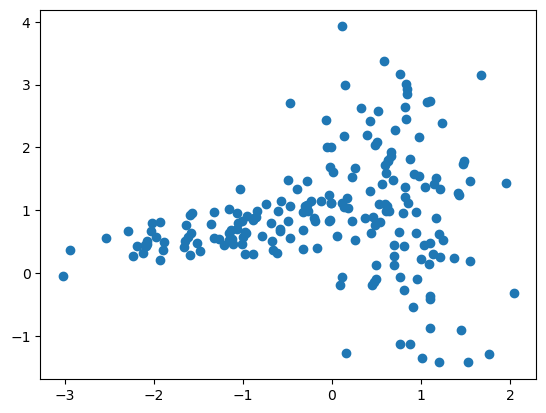

In [51]:
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)

plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

In [52]:
# Optional: Apply PCA (useful if X has more than 2 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xc_2)

### K-means helper functions

In [53]:
# Function for initializing random centroids
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

In [54]:
# Assign each point to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [55]:
# Calculating new centroids as an average of points in each cluster
def compute_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [56]:
# Calculating the cost as the total distance to the centroid
def compute_cost(X, centroids, labels):
    return sum(np.linalg.norm(X[i] - centroids[labels[i]])**2 for i in range(len(X)))

### KMeans clustering algorithm

In [57]:
def kmeans_custom(X, k, max_iter=100, tol=1e-4):
    best_cost = np.inf
    best_centroids = None
    best_labels = None

    for _ in range(100): 
        centroids = initialize_centroids(X, k)
        prev_cost = None

        for i in range(max_iter):
            labels = assign_clusters(X, centroids)
            centroids = compute_centroids(X, labels, k)
            cost = compute_cost(X, centroids, labels)
            if prev_cost is not None and abs(prev_cost - cost) < tol:
                break
            prev_cost = cost

        if cost < best_cost:
            best_cost = cost
            best_centroids = centroids
            best_labels = labels

    return best_centroids, best_labels, best_cost

### Find Best k Using Silhouette Score

In [58]:
k_range = range(2, 11)
best_k = None
best_score = -1
best_centroids = None
best_labels = None
silhouette_scores = []

for k in k_range:
    try:
        centroids, labels, cost = kmeans_custom(X_pca, k)
        score = silhouette_score(X_pca, labels)
        silhouette_scores.append(score)
        if score > best_score:
            best_score = score
            best_k = k
            best_centroids = centroids
            best_labels = labels
    except:
        silhouette_scores.append(-1)

print(f"Best k in Silhouette Score: {best_k}, score = {best_score:.3f}")

Best k in Silhouette Score: 3, score = 0.468


### Visualize different k values

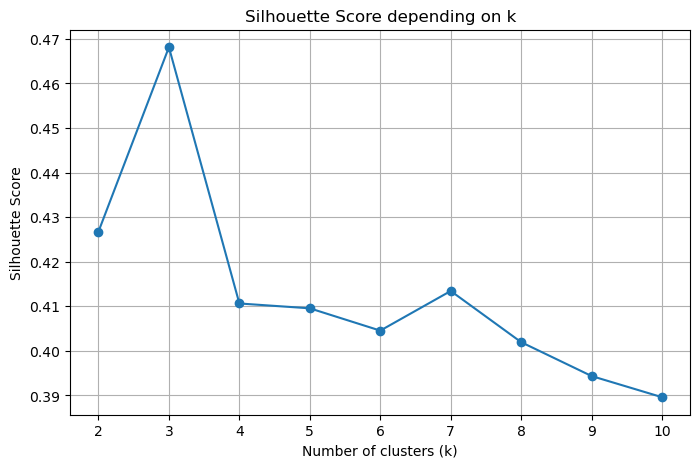

In [59]:
plt.figure(figsize=(8, 5))
plt.plot(list(k_range), silhouette_scores, marker='o')
plt.title('Silhouette Score depending on k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

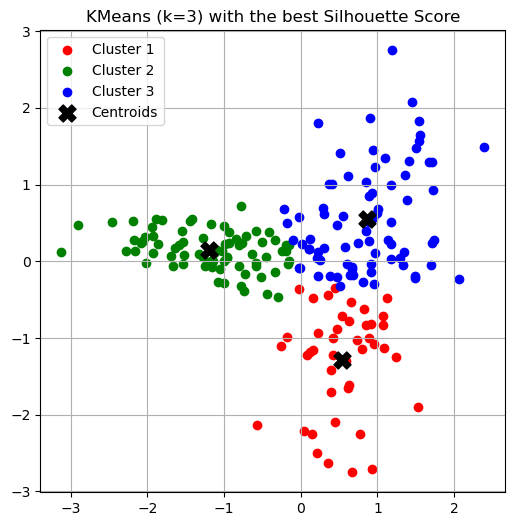

In [60]:
plt.figure(figsize=(6, 6))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta', 'yellow']
for i in range(best_k):
    plt.scatter(X_pca[best_labels == i, 0], X_pca[best_labels == i, 1],
                label=f'Cluster {i+1}', color=colors[i % len(colors)])
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='black', marker='X', s=150, label='Centroids')
plt.title(f'KMeans (k={best_k}) with the best Silhouette Score')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()